## 라이브러리 불러오기

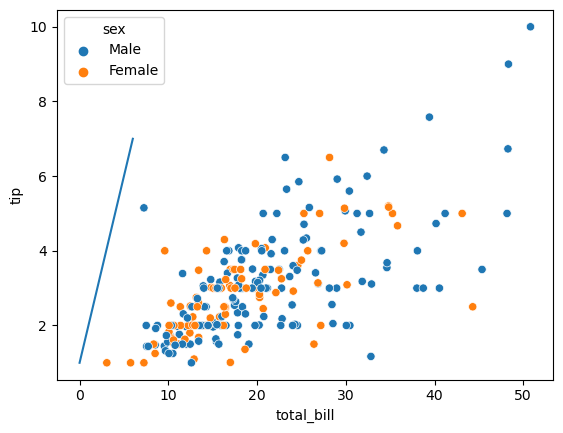

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

tips = sns.load_dataset("tips")

fig, ax = plt.subplots()
ax.plot([1,2,3,4,5,6,7]) # matplotlib 시ㅏㄱ화
sns.scatterplot(x='total_bill', y = 'tip', hue = 'sex', ax = ax, data = tips) # seaborn 시각화
plt.savefig("output/result.png")
plt.show()

# 데이터 : pandas 데이터프레임
# x = 컬럼명, y = 컬럼명, hue = 컬럼명

## matplotlib와 seaborn을 동시에 사용한 subplotting
- 다중차트를 하나의 도화지에 담도록 하겠다.

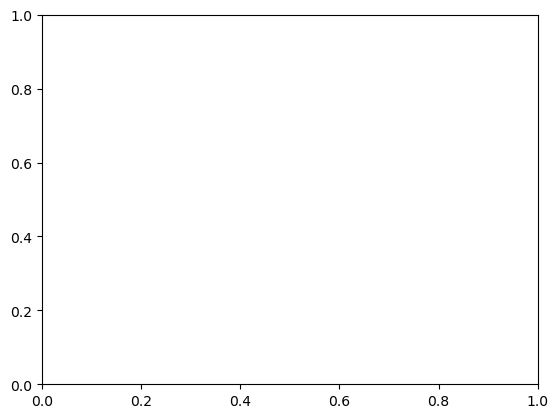

In [16]:
fig, ax = plt.subplots()

plt.show()

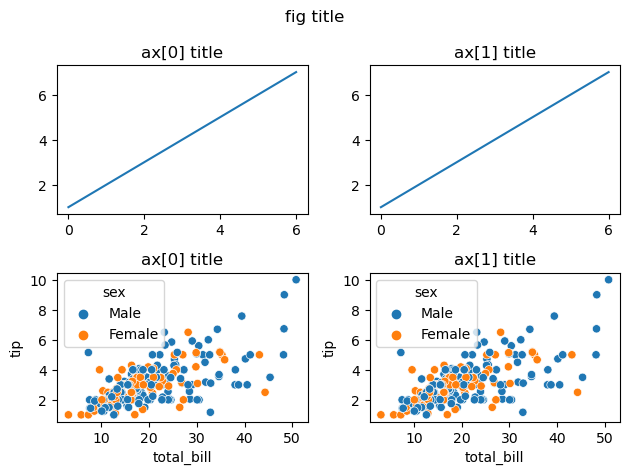

In [37]:
fig, ax = plt.subplots(nrows = 2, ncols = 2)


ax[0,0].set_title("ax[0] title")
ax[0,0].plot([1,2,3,4,5,6,7])

ax[0,1].set_title("ax[1] title")
ax[0,1].plot([1,2,3,4,5,6,7])

ax[1,0].set_title("ax[0] title")
sns.scatterplot(x='total_bill', y = 'tip', hue = 'sex', ax = ax[1,0], data = tips)

ax[1,1].set_title("ax[1] title")
sns.scatterplot(x='total_bill', y = 'tip', hue = 'sex', ax = ax[1,1], data = tips)


fig.suptitle("fig title")
plt.tight_layout()
plt.show()

## 산점도 그래프
- x축과 y축의 데이터 형태가 연속형 데이터여야 함
- 연속형 데이터의 예시: 키, 몸무게 등 소수점이 존재하는 데이터

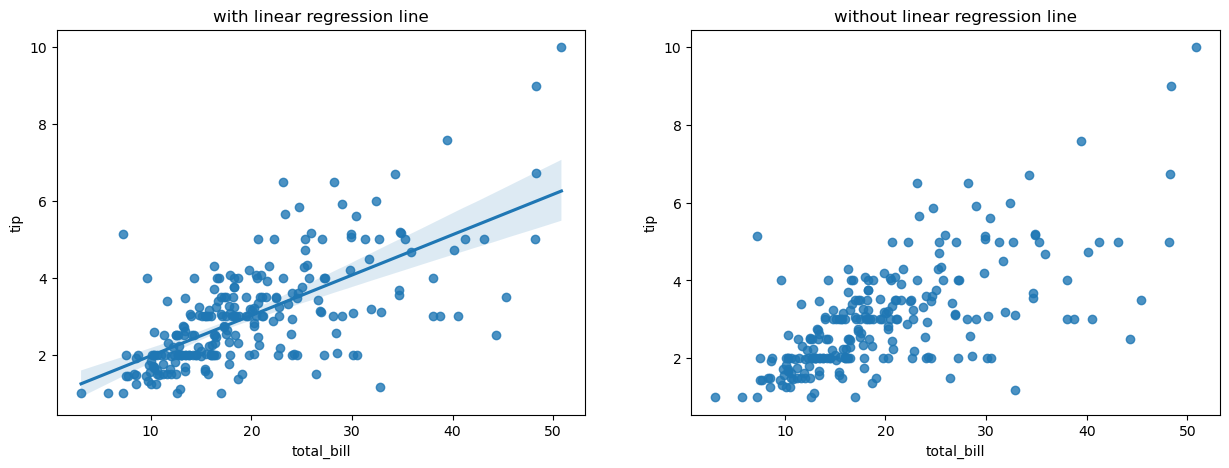

In [38]:
fig, ax=plt.subplots(1, 2, figsize=(15, 5))

sns.regplot(x="total_bill", y="tip", data=tips, ax=ax[0], fit_reg=True)
ax[0].set_title('with linear regression line')

sns.regplot(x="total_bill", y="tip", data=tips, ax=ax[1], fit_reg=False)
ax[1].set_title('without linear regression line')

plt.show()

C:\Users\imhye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


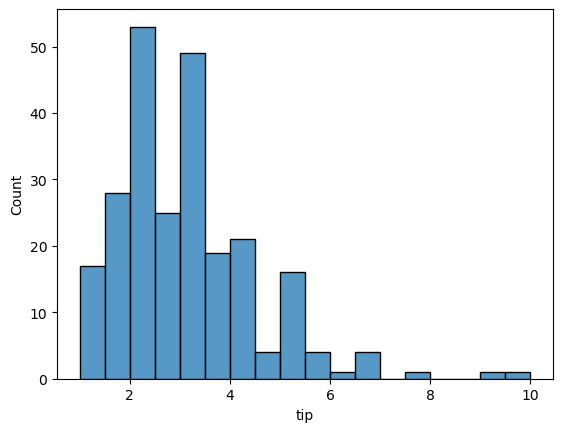

In [42]:
fig, ax = plt.subplots()
# sns.displot(x = 'tip', ax = ax, data = tips) # 경고메시지만 확인, ax 미 존재
sns.histplot(x = 'tip', ax = ax, data = tips)
plt.show()

C:\Users\imhye\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


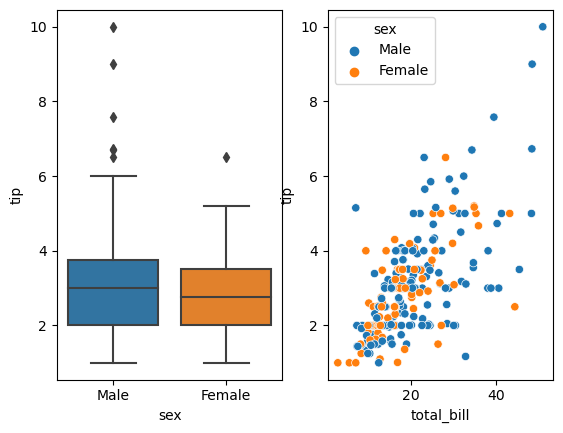

In [55]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)

sns.boxplot(x = 'sex', y = 'tip', ax = ax[0], data = tips)
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'sex', ax = ax[1], data = tips)
plt.show()

C:\Users\imhye\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\imhye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\imhye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\imhye\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.3% of the points cannot be placed; 

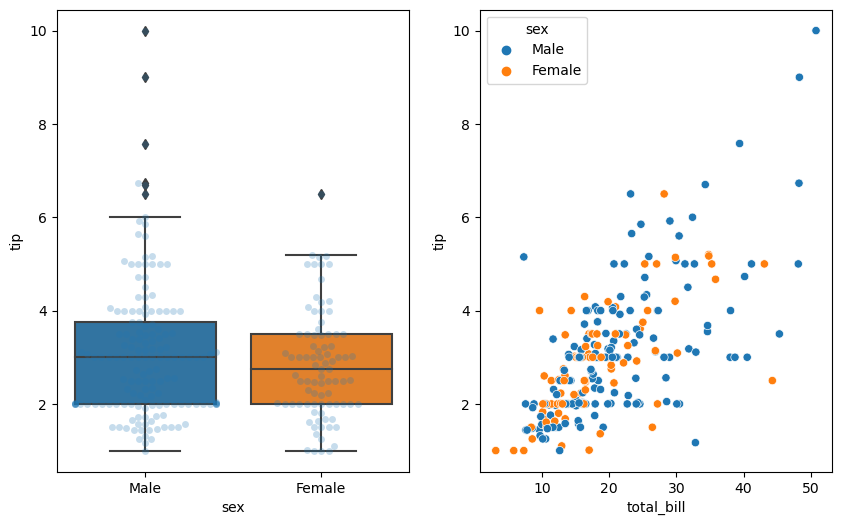

In [59]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize =(10,6))

sns.boxplot(x = 'sex', y = 'tip', ax = ax[0], data = tips)
sns.swarmplot(x = 'sex', y = 'tip', ax = ax[0], data = tips, alpha=.25)
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'sex', ax = ax[1], data = tips)
plt.show()

C:\Users\imhye\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


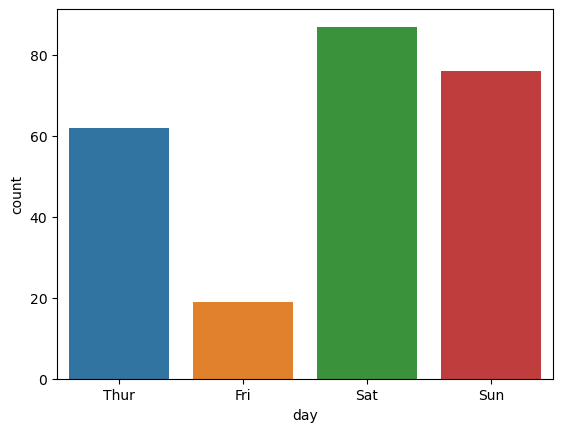

In [60]:
sns.countplot(x = 'day', data = tips)
plt.show()

C:\Users\imhye\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


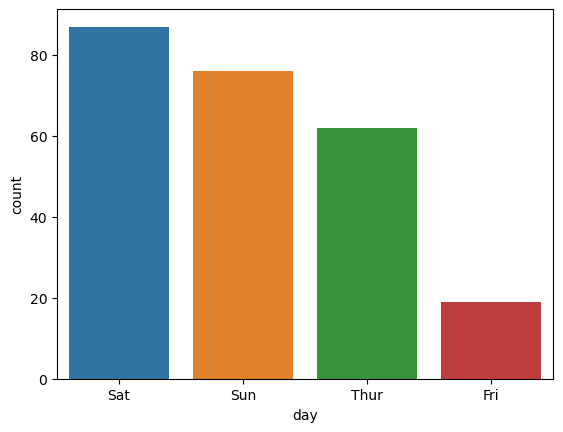

In [62]:
sns.countplot(x = 'day', data = tips, order = tips['day'].value_counts().index)
plt.show()

## 시각화 중급 레벨

### 라이브러리 가져오기

In [63]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter) # 축 설정을 할 때의 값
import seaborn as sns
import numpy as np

### 데이터 불러오기

In [64]:
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [66]:
# y축 설정할 때, 값을 소수점 2자리까지 표현
def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

### 객체 지향 선언

C:\Users\imhye\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\imhye\AppData\Local\Temp\ipykernel_9264\2031624118.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
C:\Users\imhye\AppData\Local\Temp\ipykernel_9264\2031624118.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.i

<class 'matplotlib.patches.Rectangle'>
17.68
<class 'matplotlib.patches.Rectangle'>
17.15
<class 'matplotlib.patches.Rectangle'>
20.44
<class 'matplotlib.patches.Rectangle'>
21.41
Text(0, 0, 'Thur')
Text(1, 0, 'Fri')
Text(2, 0, 'Sat')
Text(3, 0, 'Sun')


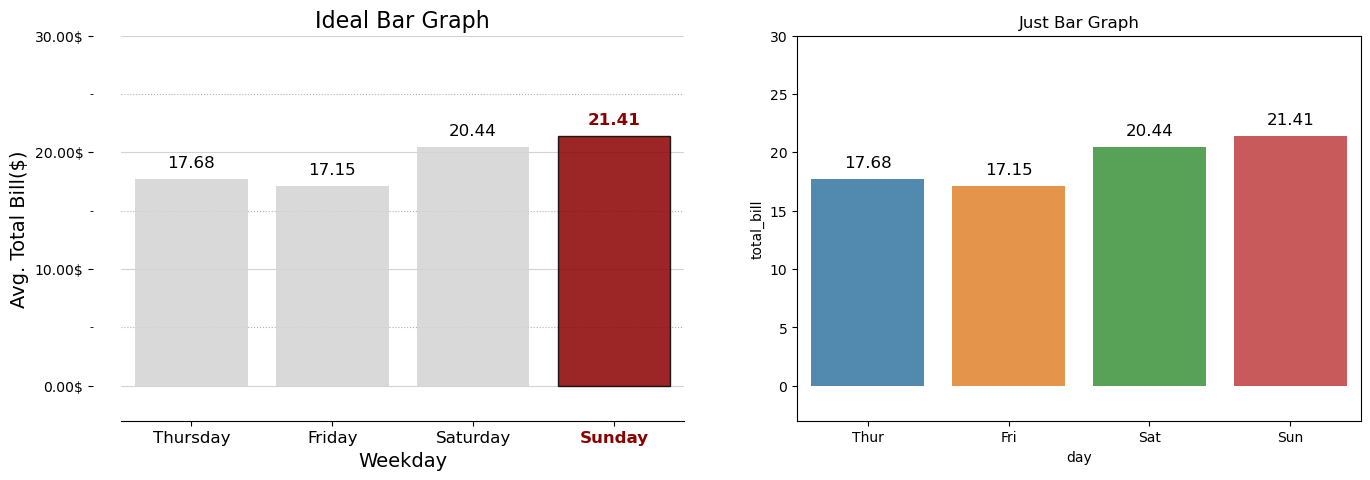

In [85]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

# 이상적인 막대 그래프
ax0 = sns.barplot(x = "day", y = 'total_bill', data = tips,
                  errorbar=None, color='lightgray', zorder=2, alpha=0.85, ax=ax[0]) # zorder=2, 

group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
# print(group_mean)
h_day = group_mean.sort_values(ascending=False).index[0] # 해당되는 결괏값의 MAX값의 인덱스 요일을 하나 가져옴
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2) # 해당되는 결괏값의 MAX값을 하나 가져옴

for p in ax0.patches:
  print(type(p))
  fontweight = "normal"
  color = "k"
  height = np.round(p.get_height(), 2)
  print(height)
  if h_mean == height:
    fontweight="bold"
    color="darkred" # Adobe Color Wheel 색상코드 추가
    p.set_facecolor(color)
    p.set_edgecolor("black")
  ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center',
           size=12,
           fontweight=fontweight, color=color)

# y축 범위 지정 옵션
ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size = 16)

# 가로세로 축, 일부 수정 및 변경
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

# y축 값 변경
ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

# y축 라벨 변경
ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

# y축 Grid 라인 수정 
ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

# x축의 값을 변경
ax0.set_xlabel("Weekday", fontsize=14)
for xtick in ax0.get_xticklabels():
  print(xtick)
  if xtick.get_text() == h_day:
    xtick.set_color("darkred")
    xtick.set_fontweight("demibold")
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)

# 그냥 일반 막대 그래프
ax1 = sns.barplot(x = "day", y = 'total_bill', data = tips, errorbar=None, alpha=0.85, ax=ax[1])
for p in ax1.patches:
  height = np.round(p.get_height(), 2)
  ax1.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12)
ax1.set_ylim(-3, 30)
ax1.set_title("Just Bar Graph")


plt.show()